# Breast Cancer Pediction Model based on the DDSM Dataset
### By: Brandon Renwick

## Imports

In [2]:
import tensorflow as tf


import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import Adam
from sklearn import metrics

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


import pandas as pd
import numpy as np
from sklearn import preprocessing
from PIL import Image as im

# Prevent Version Warning Spam
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

#### DDSM Dataset (Images)

In [3]:
# Importing training and testing data (Supplied by the DDSM Dataset)

X = np.load('ddsm_archive/cv10_data/cv10_data.npy')
Y = np.load('ddsm_archive/cv10_labels.npy')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [4]:
# Checking continuity
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5761, 299, 299, 1)
(5761,)
(1921, 299, 299, 1)
(1921,)


Text(0.5, 0.98, 'Sample Mammogram Images')

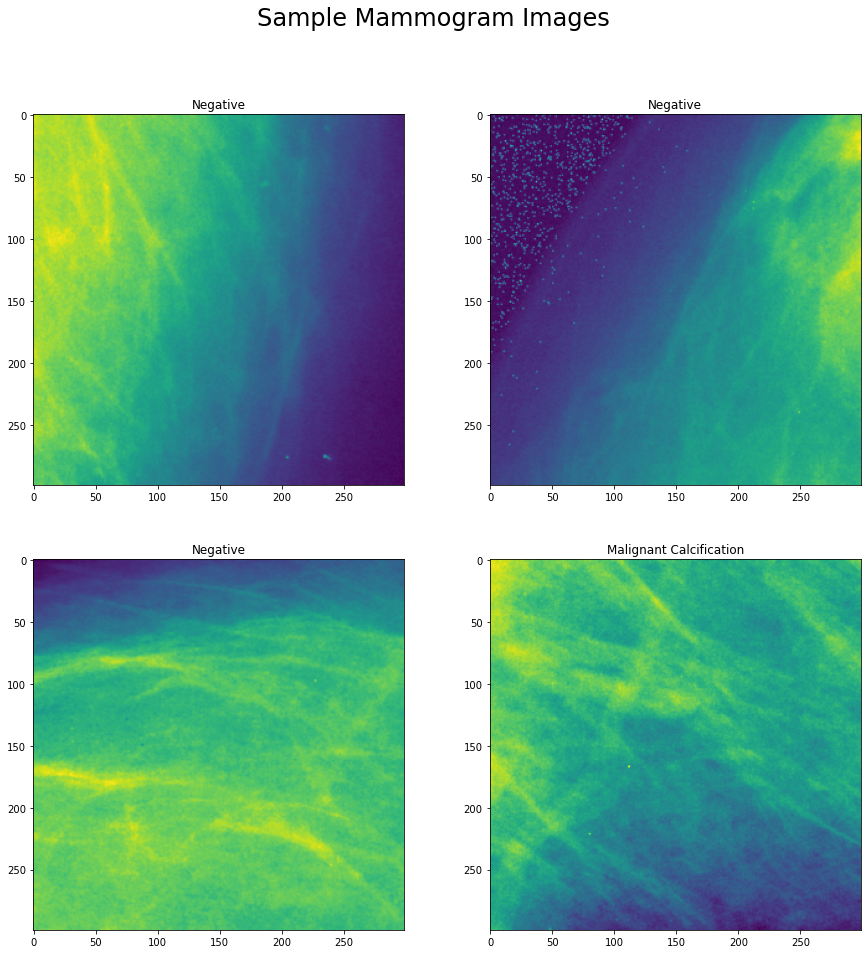

In [5]:
 from matplotlib import pyplot as plt
    
# Int to String
def diagnosis(label):
    if label == 0:
        return 'Negative'
    elif label == 1:
        return 'Benign Calcification'
    elif label == 2:
        return 'Benign Mass'
    elif label == 3:
        return 'Malignant Calcification'
    else:
        return 'Malignant Mass'

# Images
img0 = x_train[0][:, :, 0]
img1 = x_train[1][:, :, 0]
img2 = x_train[2][:, :, 0]
img3 = x_train[3][:, :, 0]

# Labels
ans0 = diagnosis(y_train[0])
ans1 = diagnosis(y_train[1])
ans2 = diagnosis(y_train[2])
ans3 = diagnosis(y_train[3])
        

f, axarr = plt.subplots(2, 2, figsize=(15, 15))
# Image 0
axarr[0,0].set_title(ans0)
axarr[0,0].imshow(img0)
# Image 1
axarr[0,1].set_title(ans1)
axarr[0,1].imshow(img1)
# Image 2
axarr[1,0].set_title(ans2)
axarr[1,0].imshow(img2)
# Image 3
axarr[1,1].set_title(ans3)
axarr[1,1].imshow(img3)
f.suptitle('Sample Mammogram Images', fontsize=24)

In [6]:
# TODO: Build CNN With Keras to Determine accuracy of malignant or benign masses

model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(299,299,1)))
model.add(Activation(tf.keras.activations.relu))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dropout(.2, input_shape=(2,)))
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

In [7]:
# Train CNN Model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64, validation_data=(x_test, y_test), callbacks=[monitor], verbose=1)
model.save('CNN_model')


Train on 5761 samples, validate on 1921 samples
Epoch 1/10
5761/5761 [==============================] - 133s 23ms/step - loss: 493.2120 - accuracy: 0.7749 - val_loss: 1.3196 - val_accuracy: 0.8699
Epoch 2/10
5761/5761 [==============================] - 133s 23ms/step - loss: 1.1900 - accuracy: 0.8787 - val_loss: 1.2107 - val_accuracy: 0.8610
Epoch 3/10
5761/5761 [==============================] - 132s 23ms/step - loss: 1.0720 - accuracy: 0.8899 - val_loss: 1.1246 - val_accuracy: 0.8647
Epoch 4/10
5761/5761 [==============================] - 130s 23ms/step - loss: 0.7997 - accuracy: 0.8913 - val_loss: 0.9696 - val_accuracy: 0.8652
Epoch 5/10
5761/5761 [==============================] - 132s 23ms/step - loss: 1.5959 - accuracy: 0.8875 - val_loss: 1.1102 - val_accuracy: 0.8641
Epoch 6/10
5761/5761 [==============================] - 138s 24ms/step - loss: 0.6916 - accuracy: 0.8922 - val_loss: 0.9216 - val_accuracy: 0.8745
Epoch 7/10
5761/5761 [==============================] - 132s 23ms/s

## Testing Performance of CNN

In [8]:
# Saves a lot of time each time the kernel is reset
#model = keras.models.load_model('CNN_model')
pred = model.predict(x_test)

### Evaluating Model's Guesses for non-negative values
#### Non-Negative guesses by our model is one of the most important metrics for the purpose of this project

In [10]:
#Sample Predictions

predict_classes = np.argmax(pred, axis=1)

unique_indices = []
def uniques():
    for i in range(0, len(y_test)-1):
        if y_test[i] != 0:
            unique_indices.append(i)

uniques()


#### CNN Guesses

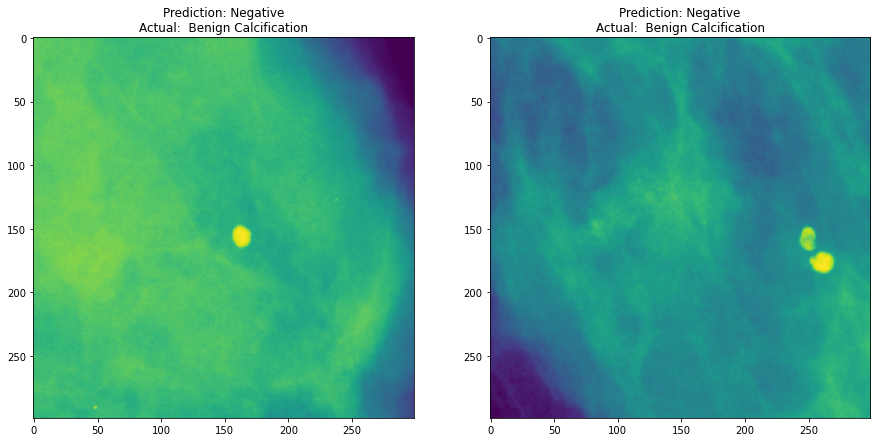

In [11]:
num1 = unique_indices[0]
num2 = unique_indices[16]


img0 = x_test[num1][:, :, 0]
img1 = x_test[num2][:, :, 0]

ans0 = diagnosis(y_test[num1])
ans1 = diagnosis(y_test[num2])

guess0 = diagnosis(predict_classes[num1])
guess1 = diagnosis(predict_classes[num2])

f, (axarr1, axarr2) = plt.subplots(1, 2, figsize=(15, 15))
# Image 0
axarr1.set_title("Prediction: " + guess0 + "\nActual:  " + ans0)
axarr1.imshow(img0)
# Image 1
axarr2.set_title("Prediction: " + guess1 + "\nActual:  " + ans1)
axarr2.imshow(img1)

### CNN Statistics

In [26]:
from sklearn import metrics
true_classes = y_test
print(metrics.classification_report(true_classes, predict_classes))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1677
           1       0.38      0.07      0.11       137
           2       0.00      0.00      0.00         8
           3       0.33      0.04      0.08        89
           4       0.00      0.00      0.00        10

    accuracy                           0.87      1921
   macro avg       0.32      0.22      0.23      1921
weighted avg       0.81      0.87      0.83      1921



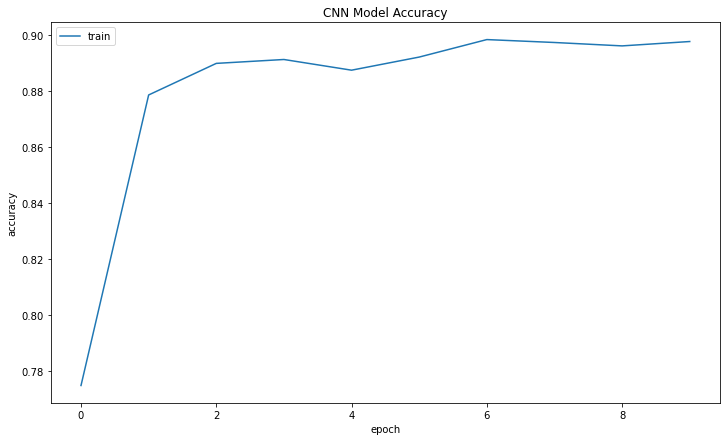

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,7))
plt.plot(history.history['accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.show()

## Function and Chart for Confusion Matrix for CNN

Confusion matrix, without normalization
[[1667    7    0    3    0]
 [ 123    9    0    5    0]
 [   8    0    0    0    0]
 [  77    8    0    4    0]
 [  10    0    0    0    0]]


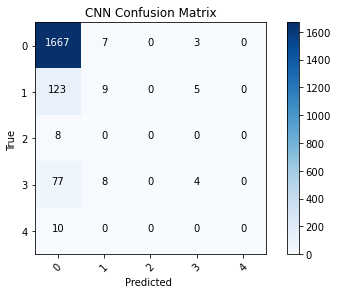

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True ')
    plt.xlabel('Predicted ')
    
   
cm = confusion_matrix(y_true=y_test, y_pred=predict_classes)
cm_plot_labels = [0, 1, 2, 3 ,4]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="CNN Confusion Matrix")

## Transfer Learning Model

### Note: After several hours of trying to integrate baseline Keras pre-trained models, here is the conclusion:
#### 1. They are pre-trained for 3 color channels, whereas the DDSM data sets only come in grayscale
#### 2. Conversions from 1 channel to 3 channels result in unplausable training times, memory overflow, and Kernel Disconnections
#### 3. I will be using a pre-trained model from Github which converts the VGG16 model to accept grayscale images

In [34]:
modified_vgg16 = keras.models.load_model('grayscale_model')

In [35]:
transfer_model = modified_vgg16

# Compile
transfer_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=1, verbose=2, mode='auto')

In [36]:
# Train Transfer Learning Model
transfer_history = transfer_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64, validation_data=(x_test, y_test), callbacks=[monitor], verbose=1)

Train on 5761 samples, validate on 1921 samples
Epoch 1/10
5761/5761 [==============================] - 131s 23ms/step - loss: 0.7375 - accuracy: 0.8998 - val_loss: 0.8753 - val_accuracy: 0.8704
Epoch 2/10
5761/5761 [==============================] - 133s 23ms/step - loss: 0.7780 - accuracy: 0.9056 - val_loss: 0.9384 - val_accuracy: 0.8610
Epoch 00002: early stopping


In [37]:
transfer_pred = transfer_model.predict(x_test)

### Additional Evaluation of Abnormal Images

In [39]:
#Sample Predictions

transfer_predict_classes = np.argmax(transfer_pred, axis=1)

unique_indices = []
def uniques():
    for i in range(0, len(y_test)-1):
        if y_test[i] != 0:
            unique_indices.append(i)

uniques()


#### Transfer Learning Guesses

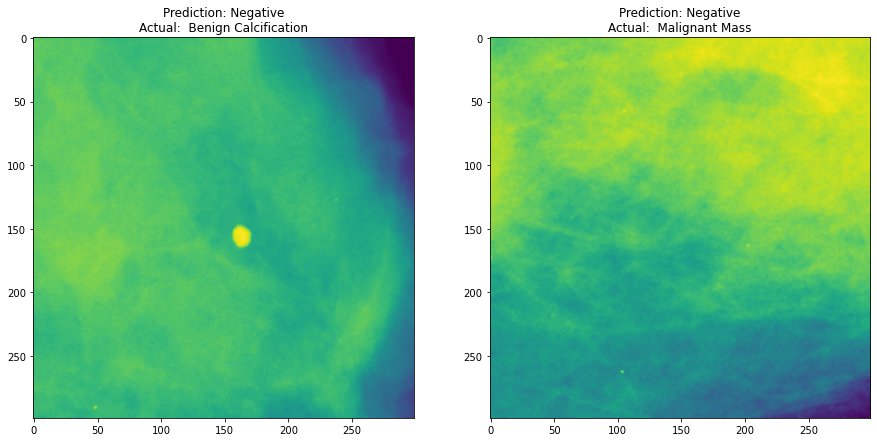

In [40]:
num1 = unique_indices[0]
num2 = unique_indices[1]


img0 = x_test[num1][:, :, 0]
img1 = x_test[num2][:, :, 0]

ans0 = diagnosis(y_test[num1])
ans1 = diagnosis(y_test[num2])

guess0 = diagnosis(predict_classes[num1])
guess1 = diagnosis(predict_classes[num2])

f, (axarr1, axarr2) = plt.subplots(1, 2, figsize=(15, 15))
# Image 0
axarr1.set_title("Prediction: " + guess0 + "\nActual:  " + ans0)
axarr1.imshow(img0)
# Image 1
axarr2.set_title("Prediction: " + guess1 + "\nActual:  " + ans1)
axarr2.imshow(img1)

### Transfer Learning Statistics

In [41]:
from sklearn import metrics
true_classes = y_test
print(metrics.classification_report(true_classes, predict_classes))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1677
           1       0.38      0.07      0.11       137
           2       0.00      0.00      0.00         8
           3       0.33      0.04      0.08        89
           4       0.00      0.00      0.00        10

    accuracy                           0.87      1921
   macro avg       0.32      0.22      0.23      1921
weighted avg       0.81      0.87      0.83      1921



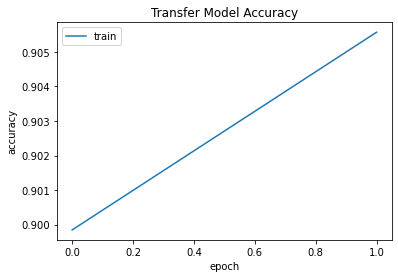

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(transfer_history.history['accuracy'])
plt.title('Transfer Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.show()

Confusion matrix, without normalization
[[1630   35    0   12    0]
 [ 116   18    0    3    0]
 [   7    1    0    0    0]
 [  78    5    0    6    0]
 [  10    0    0    0    0]]


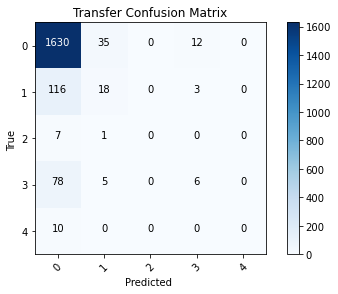

In [43]:
tcm = confusion_matrix(y_true=y_test, y_pred=transfer_predict_classes)
cm_plot_labels = [0, 1, 2, 3 ,4]
plot_confusion_matrix(cm=tcm, classes=cm_plot_labels, title="Transfer Confusion Matrix")

In [44]:
true_classes = y_test

print('Validation Statistics:')
print('-----------------------\n')
correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))

score = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(score))
print('\n\n')

Validation Statistics:
-----------------------

Accuracy: 0.8745445080687142
Precision score: 0.814209702800864
Recall score: 0.8745445080687142





# Evaluating the effectiveness of the models

In [45]:
unique_actual = len(unique_indices)
unique_guesses = 0

comparison_list = []

for index in unique_indices:
    if y_test[index] != 0 and predict_classes[index] != 0:
        unique_guesses += 1
        comparison_list.append(index)

print('Percentage of nonzero images that were identified:')        
print(unique_guesses / unique_actual)

Percentage of nonzero images that were identified:
0.10655737704918032


In [46]:
# All Nonzero Guesses
for index in unique_indices:
    if y_test[index] != 0 and predict_classes[index] != 0:
        print(f"Prediction: {diagnosis(predict_classes[index])}  \nActual:     {diagnosis(y_test[index])}")
        print('---------------------------------------')

Prediction: Benign Calcification  
Actual:     Malignant Calcification
---------------------------------------
Prediction: Benign Calcification  
Actual:     Benign Calcification
---------------------------------------
Prediction: Malignant Calcification  
Actual:     Benign Calcification
---------------------------------------
Prediction: Benign Calcification  
Actual:     Malignant Calcification
---------------------------------------
Prediction: Benign Calcification  
Actual:     Benign Calcification
---------------------------------------
Prediction: Malignant Calcification  
Actual:     Malignant Calcification
---------------------------------------
Prediction: Malignant Calcification  
Actual:     Malignant Calcification
---------------------------------------
Prediction: Benign Calcification  
Actual:     Benign Calcification
---------------------------------------
Prediction: Benign Calcification  
Actual:     Benign Calcification
---------------------------------------
Predict

In [47]:
correct_guesses = []
for index in comparison_list:
    if y_test[index] == predict_classes[index]:
        correct_guesses.append(index)
correct_guesses

[199, 356, 522, 529, 550, 552, 621, 875, 1424, 1551, 1598, 1853, 1865]

In [48]:
incorrect_guesses = []
for index in comparison_list:
    if y_test[index] != predict_classes[index]:
        incorrect_guesses.append(index)
incorrect_guesses

[62, 243, 262, 593, 707, 789, 800, 1405, 1479, 1481, 1599, 1614, 1831]

### Sample Correct Guesses

Text(0.5, 1.0, 'Prediction: Malignant Calcification\nActual:  Malignant Calcification')

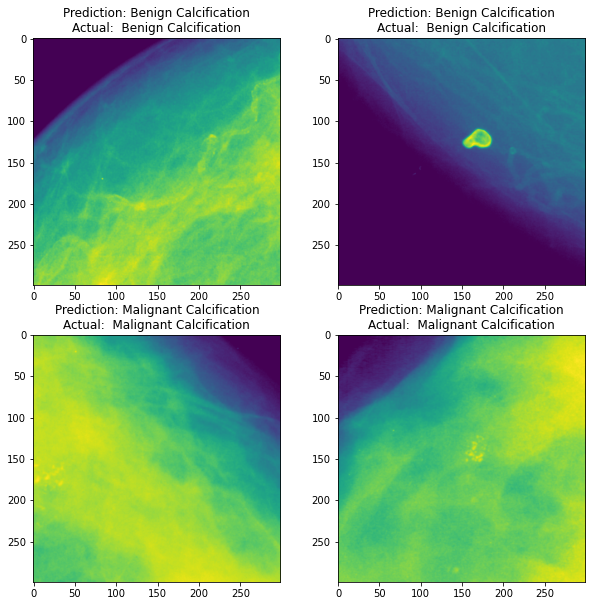

In [52]:
num0 = correct_guesses[0]
num1 = correct_guesses[1]
num2 = correct_guesses[2]
num3 = correct_guesses[3]

img0 = x_test[num0][:, :, 0]
img1 = x_test[num1][:, :, 0]
img2 = x_test[num2][:, :, 0]
img3 = x_test[num3][:, :, 0]

ans0 = diagnosis(y_test[num0])
ans1 = diagnosis(y_test[num1])
ans2 = diagnosis(y_test[num2])
ans3 = diagnosis(y_test[num3])

guess0 = diagnosis(predict_classes[num0])
guess1 = diagnosis(predict_classes[num1])               
guess2 = diagnosis(predict_classes[num2])
guess3 = diagnosis(predict_classes[num3])

f, axarr = plt.subplots(2,2, figsize=(10, 10))
axarr[0,0].imshow(img0)
axarr[0,0].set_title("Prediction: " + guess0 + "\nActual:  " + ans0)
axarr[0,1].imshow(img1)
axarr[0,1].set_title("Prediction: " + guess1 + "\nActual:  " + ans1)
axarr[1,0].imshow(img2)
axarr[1,0].set_title("Prediction: " + guess2 + "\nActual:  " + ans2)
axarr[1,1].imshow(img3)
axarr[1,1].set_title("Prediction: " + guess3 + "\nActual:  " + ans3)

## Sample Incorrect Guesses

Text(0.5, 1.0, 'Prediction: Malignant Calcification\nActual:  Benign Calcification')

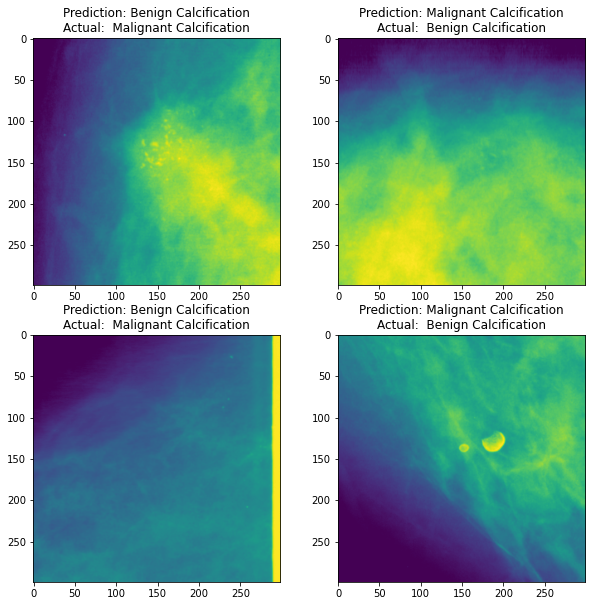

In [50]:
num0 = incorrect_guesses[0]
num1 = incorrect_guesses[1]
num2 = incorrect_guesses[2]
num3 = incorrect_guesses[3]

img0 = x_test[num0][:, :, 0]
img1 = x_test[num1][:, :, 0]
img2 = x_test[num2][:, :, 0]
img3 = x_test[num3][:, :, 0]

ans0 = diagnosis(y_test[num0])
ans1 = diagnosis(y_test[num1])
ans2 = diagnosis(y_test[num2])
ans3 = diagnosis(y_test[num3])

guess0 = diagnosis(predict_classes[num0])
guess1 = diagnosis(predict_classes[num1])               
guess2 = diagnosis(predict_classes[num2])
guess3 = diagnosis(predict_classes[num3])

f, axarr = plt.subplots(2,2, figsize=(10, 10))
axarr[0,0].imshow(img0)
axarr[0,0].set_title("Prediction: " + guess0 + "\nActual:  " + ans0)
axarr[0,1].imshow(img1)
axarr[0,1].set_title("Prediction: " + guess1 + "\nActual:  " + ans1)
axarr[1,0].imshow(img2)
axarr[1,0].set_title("Prediction: " + guess2 + "\nActual:  " + ans2)
axarr[1,1].imshow(img3)
axarr[1,1].set_title("Prediction: " + guess3 + "\nActual:  " + ans3)